In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
import tensorflow as tf
print(tf.__version__)


2.19.0


[0]


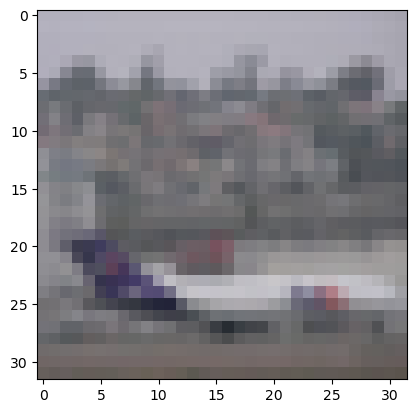

In [4]:
i=30000
plt.imshow(X_train[i])
print(y_train[i])

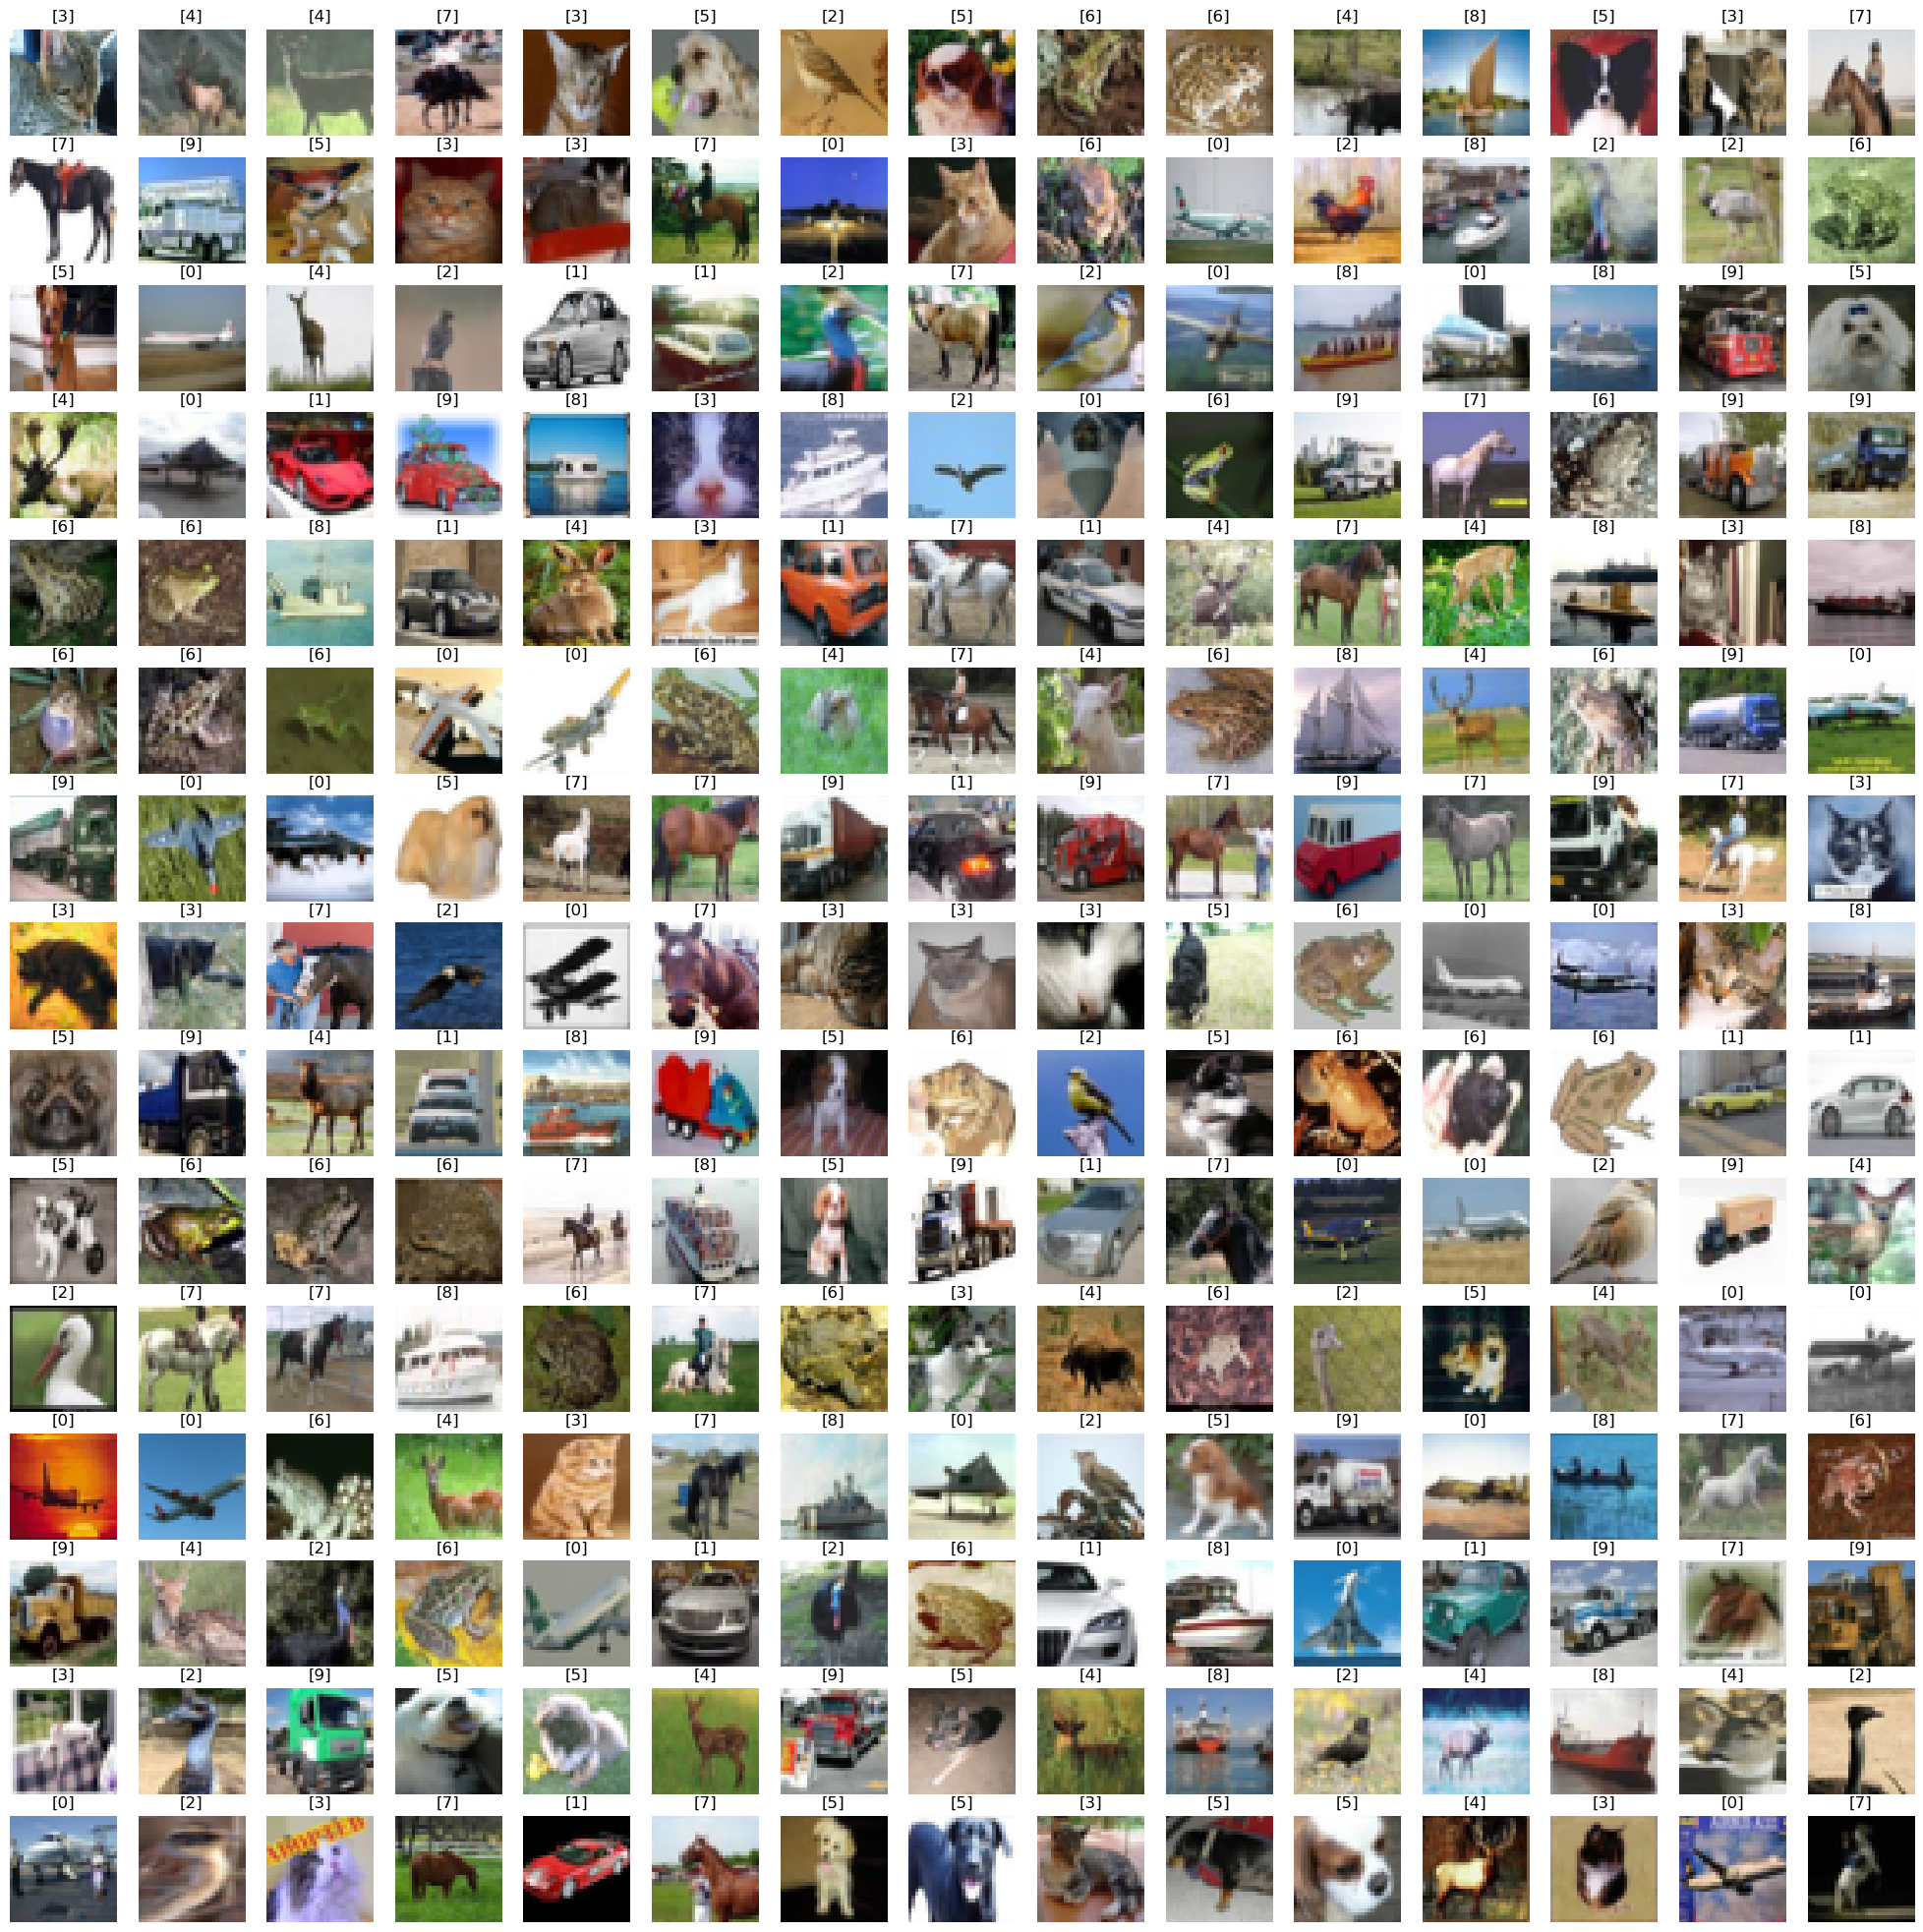

In [5]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)

for i in np.arange(0,l_grid*w_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

In [6]:
#DATA PREPARATION

In [7]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [8]:
number_CAT=10

In [9]:
y_train #convert these into binary values, from decimal to binary format

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
import keras
y_train=keras.utils.to_categorical(y_train,number_CAT)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
y_test=keras.utils.to_categorical(y_test,number_CAT)

In [13]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
X_train=X_train/255

In [15]:
X_test=X_test/255

In [16]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape=X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

In [20]:
#TRAINING THE MODEL

In [21]:
#Keras is an api, that sits on top of the tensorflow, very easy way to build a cnn, it uses tensor flow in the bg

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,Dense,Flatten,Dropout
#conv2D-this will perform the convolution, maxpooling- compresses the actual features and takes the max value, the avg pooling- just so there are two ways of pooling, dense- to create a fully connected cnn, flatten-to flatten the array,dropout for regularisation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [23]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))

C:\Users\Sangeeta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))


In [25]:
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

In [26]:
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

In [27]:
cnn_model.add(Flatten())

In [28]:
cnn_model.add(Dense(units=1024,activation='relu'))
#creates a fully connected cnn, the units here are 512-neurons)
#This is creating a hiddenlayer

In [29]:
cnn_model.add(Dense(units=1024,activation='relu'))

In [30]:
#This is for the output layer
cnn_model.add(Dense(units=10,activation='softmax'))
#We use softmax since we want classification at this stage, and not a continuous flow of values, like a regression problem

In [31]:
from tensorflow.keras.optimizers import RMSprop

cnn_model.compile(loss='categorical_crossentropy',optimizer = RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [32]:
#All the values of root mean square and validation will be stored in history
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 348s 219ms/step - accuracy: 0.3051 - loss: 1.8913
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 282s 180ms/step - accuracy: 0.5894 - loss: 1.1672


In [33]:
#EVALUATION OF THE MODEL

In [34]:
evaluation=cnn_model.evaluate(X_test,y_test)
#This is to understand how far the model has actually understood 

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.6913 - loss: 0.8952


In [35]:
print(evaluation[1])

0.6841999888420105


In [36]:
predicted_Classes=cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


In [37]:
predicted_Classes 

array([[8.75095066e-05, 6.46229819e-06, 8.62947665e-04, ...,
        2.58735599e-05, 6.72131684e-03, 2.09441569e-05],
       [3.81969009e-03, 4.79299389e-03, 2.25554572e-07, ...,
        2.95371533e-10, 9.91345823e-01, 4.10536522e-05],
       [2.44347975e-02, 2.07723349e-01, 1.06348009e-04, ...,
        1.12701509e-05, 7.53097057e-01, 1.43534373e-02],
       ...,
       [5.62765854e-06, 7.53186100e-08, 3.12577672e-02, ...,
        1.24682821e-02, 7.64219578e-07, 1.05280014e-06],
       [3.39468569e-01, 1.10076696e-01, 3.67968380e-02, ...,
        1.58284027e-02, 2.52441354e-02, 1.53643787e-02],
       [8.44804315e-09, 7.67734062e-14, 4.73407376e-08, ...,
        9.99036908e-01, 3.12897034e-13, 2.33324688e-12]], dtype=float32)

In [38]:
y_test=y_test.argmax(1)

In [39]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

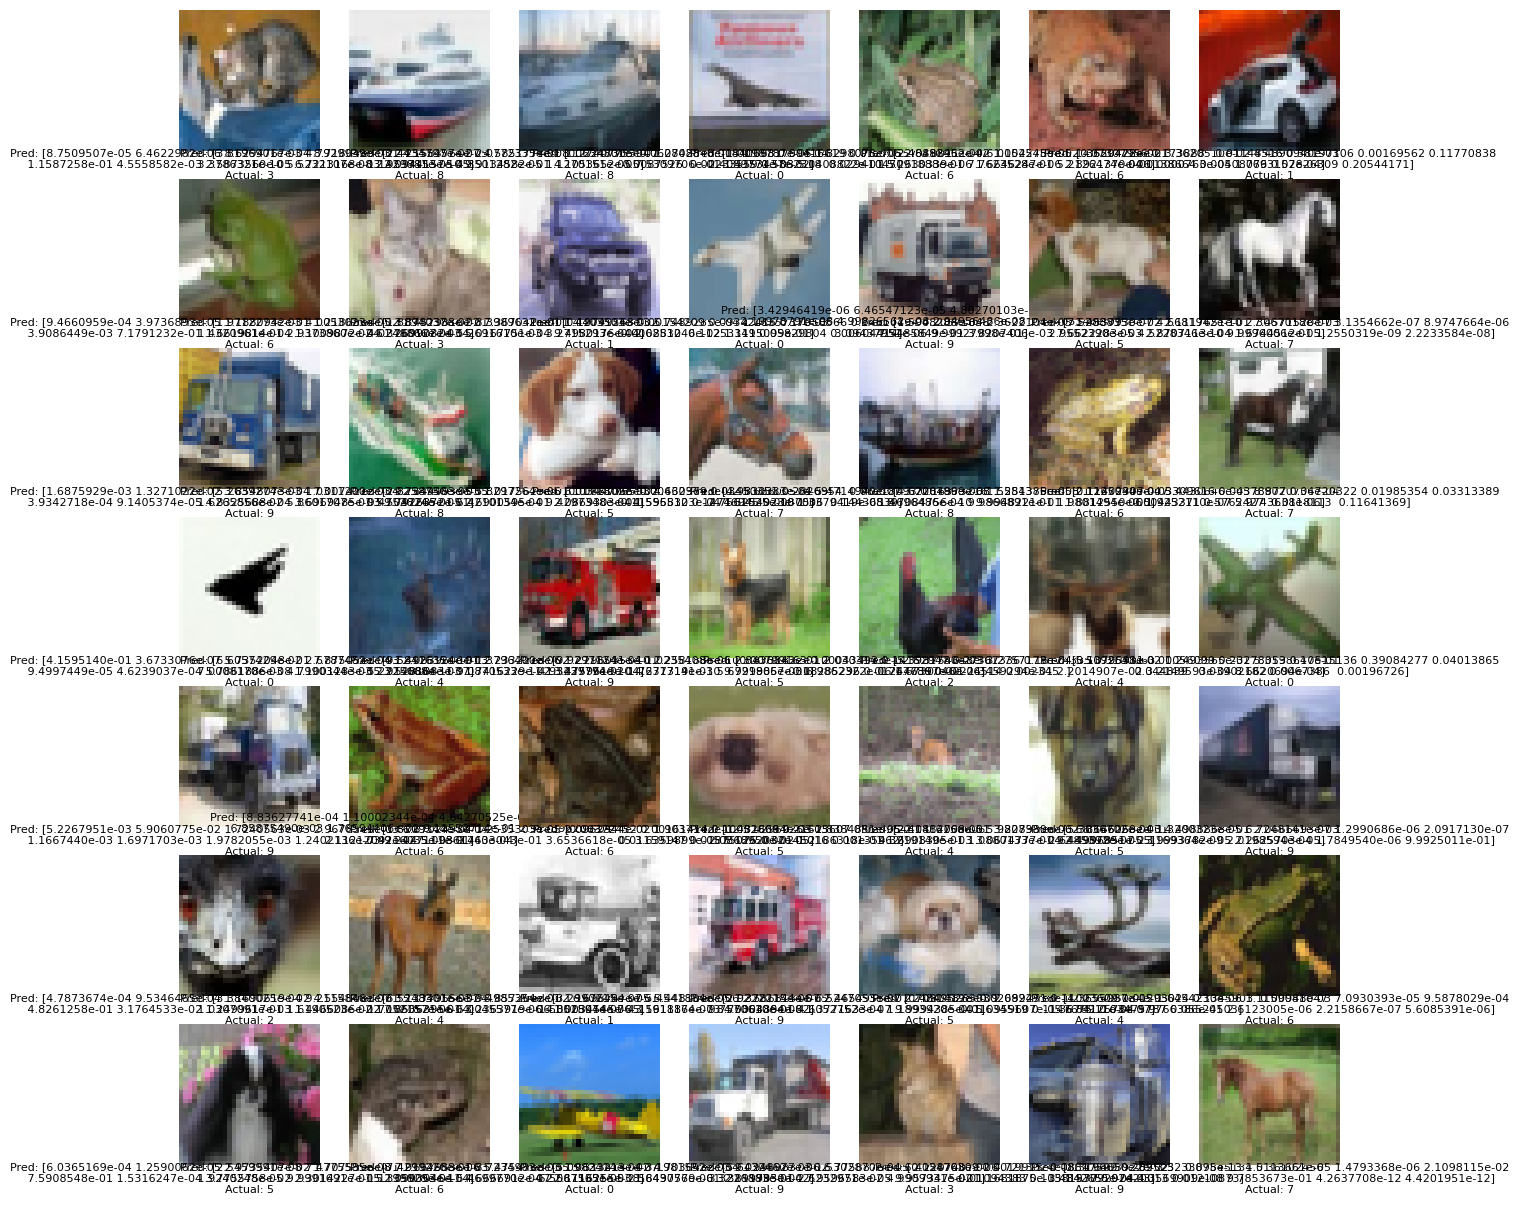

In [40]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(15, 15))  # Increase figure size
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')  # Hide axis for a cleaner look
    axes[i].text(0.5, -0.2, f"Pred: {predicted_Classes[i]}\nActual: {y_test[i]}",
                 fontsize=8, ha='center', transform=axes[i].transAxes)



In [43]:
#SAVING THE MODEL
import os
directory=os.path.join(os.getcwd(),'Saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'keras_cifar.h5')
cnn_model.save(model_path)

In [46]:
#IMAGE AUGMENTATION
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [48]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train=ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train)

In [49]:
n=8
X_train_sample=X_train[:n]


In [50]:
X_train_sample.shape

(8, 32, 32, 3)

In [ ]:
from scipy.misc import toimage
